# Introduction II

# Table of contents

1. [Random Number Extraction](#random_number_extraction)\
    1.1 [Extraction from a Standard Normal Distribution](#extraction)\
    1.2 [Histogram of Extracted Values](#hist)\
    1.3 [Fit of Normal Distribution on Extracted Values](#fit)

These are our preliminary imports to load functionalities not included in the Python Standard Library

In [1]:
import numpy as np

Plotting functionalities can be imported in the [Matplotlib](https://matplotlib.org/) Python plotting library. Importing the `pylab` module only is standard and enough for our examples too.

In [2]:
import matplotlib.pylab as plt

To request inline plots to the Jupyter Notebook engine, we use the following directive:

In [3]:
%matplotlib inline

Statistical functions are defined in `scipy`

In [4]:
from scipy import stats

Notice in particular the syntax `from scipy import stats`. This is a case of a package `scipy` from which we decide to load only the `stats` module. Then we can access

# 1. Random Number Extraction <a name="random_number_extraction"></a>

We are going to: 
- generate $N$ samples from a Standard Normal Distribution (that is, a Normal Distribution with mean 0 and standard deviation 1);
- visualize the extracted values; 
- plotting a histogram of their counts;
- plot an histogram of their distribution;
- finally fit the extracted values with a normal fit to see if the extracted values truly are standard-normally distributed.

(spoiler: they are _almost_...). 

## 1.1 Extraction from a Standard Normal Distribution <a name="extraction"></a>

The Numpy `random` module contains functionalities to generate random samples. By default it uses a [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) pseudo-random number generator.

First, we set the seed to have reproducible results

In [5]:
seed = np.random.seed(19680801)

We generate $N=10^5$ random values

In [6]:
N = 100000

using the `random.standard_normal` function

In [7]:
z = np.random.standard_normal(N)

We can visualize the extracted values $z$ using the plotting functionalities of the imported `matplotlib.pylab` module

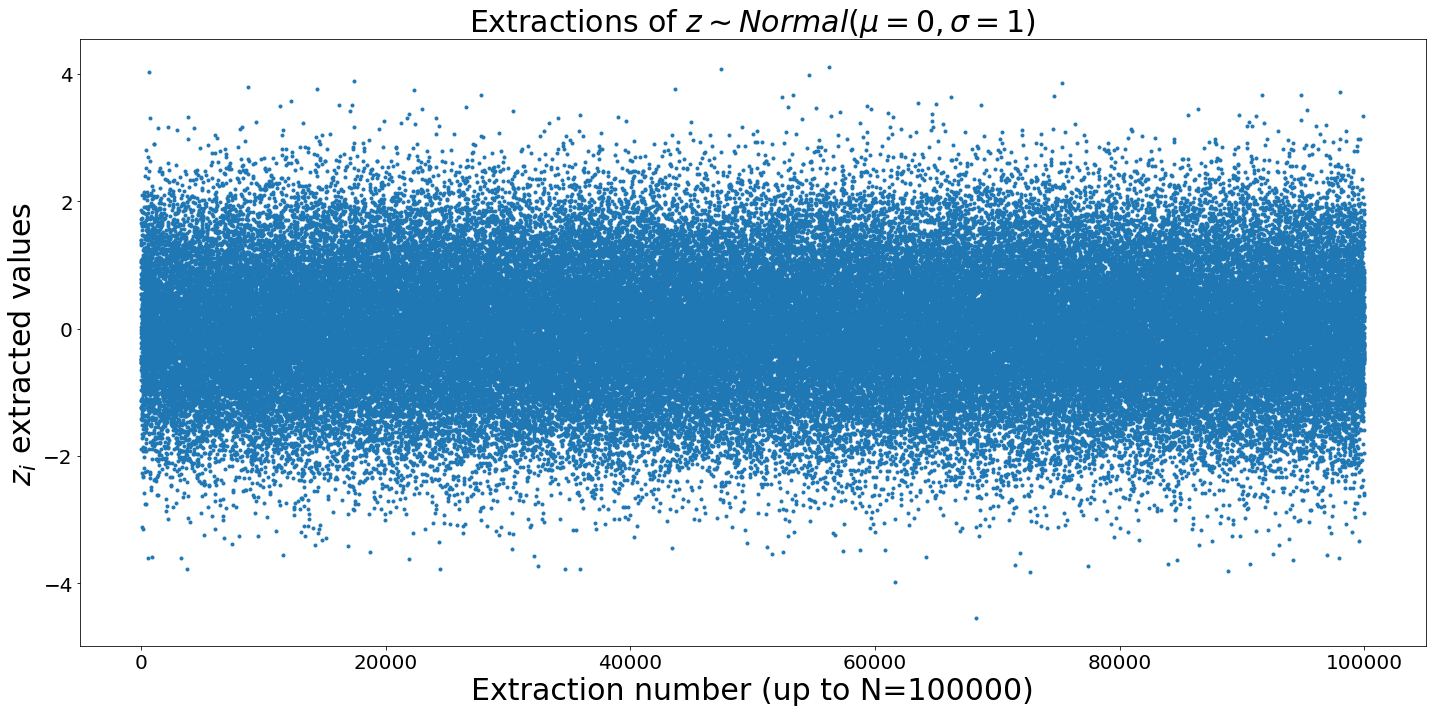

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(z, '.')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('Extraction number (up to N={})'.format(N), fontsize=30) 
ax.set_ylabel('$z_i$ extracted values', fontsize=30) 

ax.set_title(r'Extractions of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

we see a cloud of points, more dense around 0 and less at greater and smaller values.

## 1.2 Histogram of Extracted Values <a name="hist"></a>

In [9]:
num_bins = 50

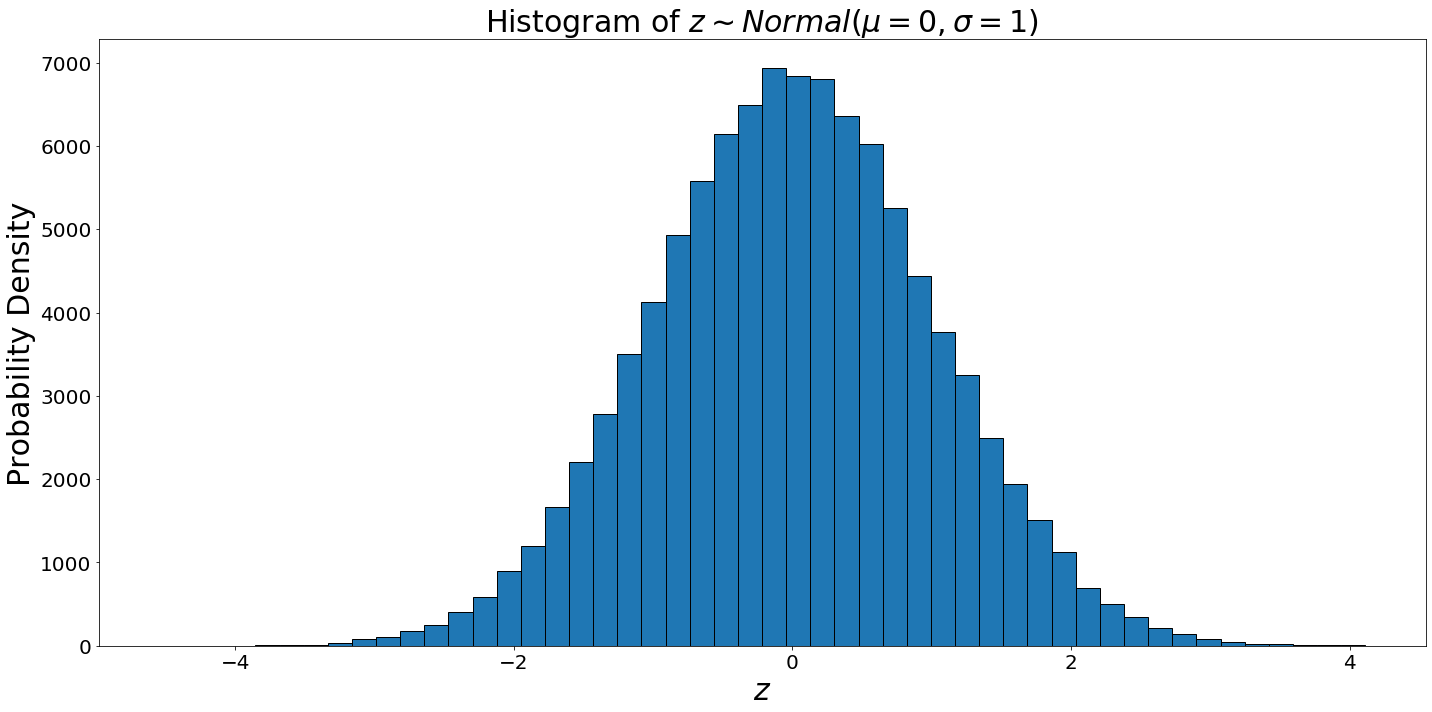

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

# the histogram of the data
ax.hist(z, num_bins, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

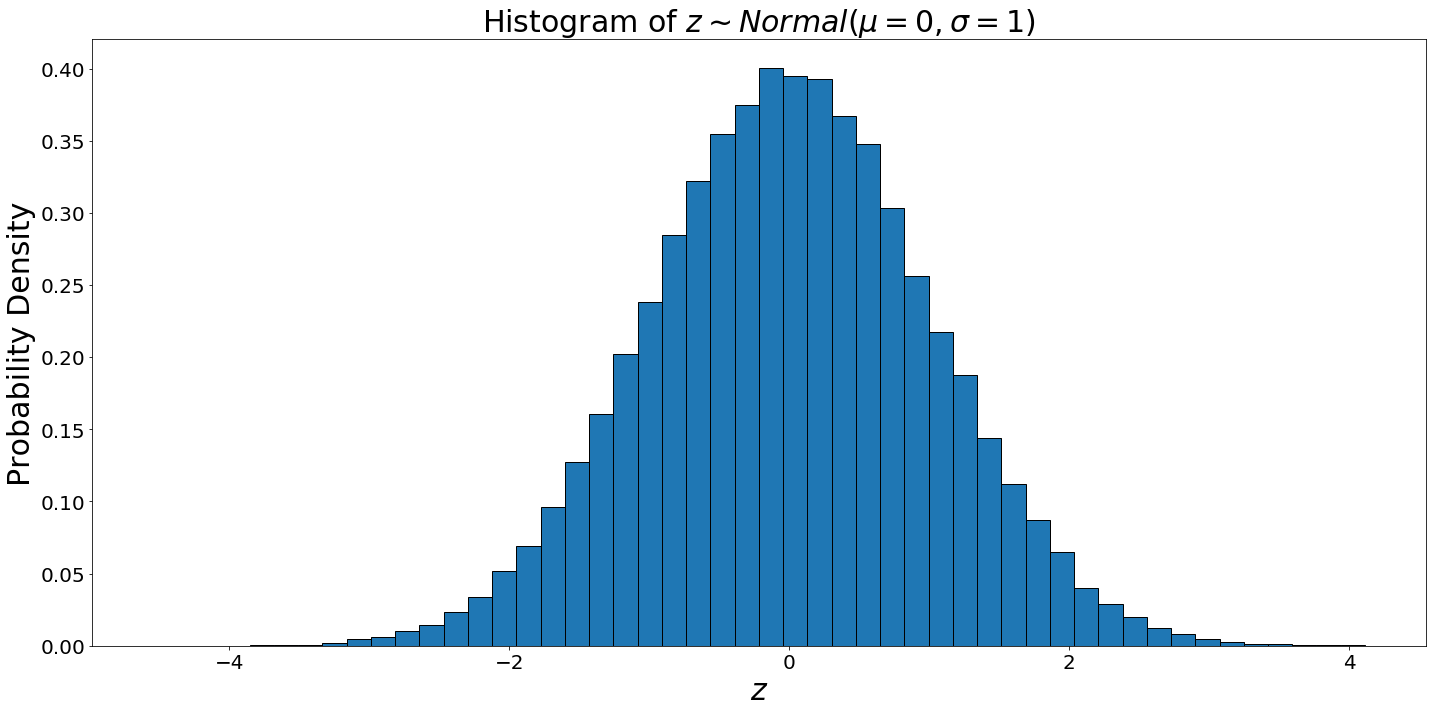

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

# the histogram of the data
heights, bin_edges, _ = ax.hist(z, num_bins, density=True, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [12]:
sum(heights * np.diff(bin_edges))

1.0

## 1.3 Fit of Normal Distribution on Extracted Values <a name="fit"></a>

In [13]:
mu, sigma = stats.norm.fit(z) # get mean and standard deviation

In [14]:
mu, sigma

(0.003904323305045829, 1.0027772249829454)

In [15]:
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
zmin, zmax = min(z), max(z)  
z_linspaced = np.linspace(zmin, zmax, N)

In [16]:
pdf_z = stats.norm.pdf(z_linspaced, mu, sigma) # now get theoretical values in our interval  

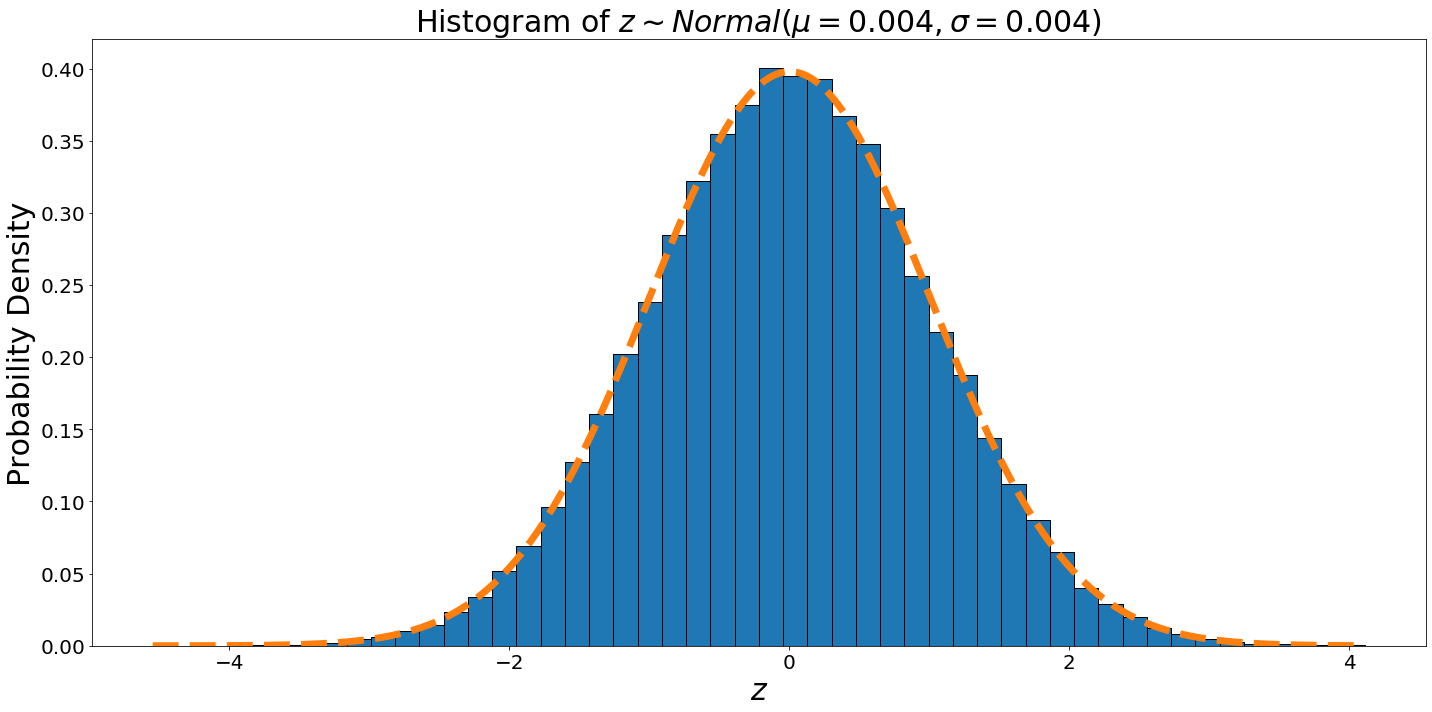

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(z, num_bins, density=True, histtype='bar', ec='black')
ax.plot(z_linspaced, pdf_z, '--', lw=7)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu={0:.3f}, \sigma={0:.3f})$'.format(mu, sigma), fontsize=30) 

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()